In [255]:
!pip install Twython
import pandas as pd
import numpy as np 
from twython import Twython

CONSUMER_KEY = "f7RkCP05ax6m5R75e7NEROblP"
CONSUMER_SECRET = "zXiRP1rQBy9d2bDuAFpwD98zzkmslML769iY0jhLDjpH88dmfM"
OAUTH_TOKEN = "994129208233295872-BdzZ761Mi4hxjWK2kRno4Fx3mlOd0wH"
OAUTH_TOKEN_SECRET = "E3HfihiBifLdCWOaoudr5hbJUdduovpTIFjRyAqC9nGs3"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [256]:
tweets = []
MAX_ATTEMPTS = 40
COUNT_OF_TWEETS_TO_BE_FETCHED = 3800 

for i in range(0,MAX_ATTEMPTS):

    if(COUNT_OF_TWEETS_TO_BE_FETCHED < len(tweets)):
        print("We Got ", len(tweets), " tweets!!!")
        break # we got the  tweets... !!

    #----------------------------------------------------------------#
    # STEP 1: Query Twitter
    # STEP 2: Save the returned tweets
    # STEP 3: Get the next max_id
    #----------------------------------------------------------------#

    # STEP 1: Query Twitter
    if(0 == i):
        # Query twitter for data. 
        results = twitter.search(q="κορονοιός",count='100')
        print("I Got:", len(results['statuses']), " tweets")
    else:
        # After the first call we should have max_id from result of previous call. Pass it in query.
        results = twitter.search(q="κορονοιός",count='100', include_entities='true',max_id=next_max_id)
        print("I Got:", len(results['statuses']), " tweets")


    # STEP 2: Save the returned tweets
    for result in results['statuses']:
#        tweet_text = result['text']
        tweets.append(result)


    # STEP 3: Get the next max_id
    try:
        # Parse the data returned to get max_id to be passed in consequent call.
        next_results_url_params = results['search_metadata']['next_results']
        next_max_id = next_results_url_params.split('max_id=')[1].split('&')[0]
    except:
        # No more next pages
        break

I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
I Got: 100  tweets
We Got  3900  tweets!!!


In [257]:
tweets_df = pd.DataFrame(tweets)

In [258]:
tweets_df.head(105)

created_at  ...                                      quoted_status
0    Thu Jul 08 21:13:09 +0000 2021  ...                                                NaN
1    Thu Jul 08 21:13:03 +0000 2021  ...                                                NaN
2    Thu Jul 08 21:10:31 +0000 2021  ...                                                NaN
3    Thu Jul 08 21:08:58 +0000 2021  ...  {'created_at': 'Thu Jul 08 15:59:44 +0000 2021...
4    Thu Jul 08 20:58:56 +0000 2021  ...                                                NaN
..                              ...  ...                                                ...
100  Thu Jul 08 18:27:59 +0000 2021  ...                                                NaN
101  Thu Jul 08 18:26:39 +0000 2021  ...                                                NaN
102  Thu Jul 08 18:26:18 +0000 2021  ...                                                NaN
103  Thu Jul 08 18:17:14 +0000 2021  ...                                                NaN
104  Thu Jul 08 18:16:11 +0000 2021  ...                                                NaN

[105 rows x 30 columns]

In [259]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [260]:
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')


In [261]:
short_tweets = tweets_df[['created_at','text','entities']]

In [262]:
short_tweets = short_tweets.rename(columns={'created_at': 'date', 'τext': 'text'} )

In [263]:
short_tweets.head()

date  ...                                           entities
0 2021-07-08 21:13:09  ...  {'hashtags': [{'text': 'freedom_pass', 'indice...
1 2021-07-08 21:13:03  ...  {'hashtags': [{'text': 'κορονοϊός', 'indices':...
2 2021-07-08 21:10:31  ...  {'hashtags': [], 'symbols': [], 'user_mentions...
3 2021-07-08 21:08:58  ...  {'hashtags': [{'text': 'κρουσματα', 'indices':...
4 2021-07-08 20:58:56  ...  {'hashtags': [], 'symbols': [], 'user_mentions...

[5 rows x 3 columns]

In [264]:
short_tweets.tail()

date  ...                                           entities
3895 2021-07-04 08:18:23  ...  {'hashtags': [], 'symbols': [], 'user_mentions...
3896 2021-07-04 08:16:31  ...  {'hashtags': [], 'symbols': [], 'user_mentions...
3897 2021-07-04 08:14:38  ...  {'hashtags': [], 'symbols': [], 'user_mentions...
3898 2021-07-04 08:13:00  ...  {'hashtags': [], 'symbols': [], 'user_mentions...
3899 2021-07-04 08:12:59  ...  {'hashtags': [], 'symbols': [], 'user_mentions...

[5 rows x 3 columns]

In [265]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [266]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [267]:
short_tweets.dtypes

date        datetime64[ns]
text                object
entities            object
dtype: object

In [268]:
short_tweets.to_csv("./koronoios.csv",index=False, index_label=False)

In [269]:
import pandas as pd
import numpy as np

In [270]:
import datetime as datetime

In [271]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [272]:
full_tweets_df =pd.read_csv("./koronoios.csv")

In [273]:
full_tweets_df.head(10)

date  ...                                           entities
0  2021-07-08 21:13:09  ...  {'hashtags': [{'text': 'freedom_pass', 'indice...
1  2021-07-08 21:13:03  ...  {'hashtags': [{'text': 'κορονοϊός', 'indices':...
2  2021-07-08 21:10:31  ...  {'hashtags': [], 'symbols': [], 'user_mentions...
3  2021-07-08 21:08:58  ...  {'hashtags': [{'text': 'κρουσματα', 'indices':...
4  2021-07-08 20:58:56  ...  {'hashtags': [], 'symbols': [], 'user_mentions...
5  2021-07-08 20:58:11  ...  {'hashtags': [], 'symbols': [], 'user_mentions...
6  2021-07-08 20:56:04  ...  {'hashtags': [], 'symbols': [], 'user_mentions...
7  2021-07-08 20:54:15  ...  {'hashtags': [{'text': 'κορονοϊός', 'indices':...
8  2021-07-08 20:53:41  ...  {'hashtags': [{'text': 'Pfizer', 'indices': [8...
9  2021-07-08 20:53:28  ...  {'hashtags': [], 'symbols': [], 'user_mentions...

[10 rows x 3 columns]

In [274]:
short_tweets = full_tweets_df

In [275]:
short_tweets.dtypes

date        object
text        object
entities    object
dtype: object

In [276]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%Y-%m-%d %H:%M:%S.', utc= True)

In [277]:
tlen = pd.Series(data=full_tweets_df['text'].values, index=full_tweets_df['date'])

In [278]:
tlen.tail()

date
2021-07-04 08:18:23+00:00    RT @yioults1: Με 50 βαθμούς κελσίου στον Καναδ...
2021-07-04 08:16:31+00:00    Κορονοϊός: Συγκρατημένη… ανησυχία για τη νέα α...
2021-07-04 08:14:38+00:00    ΗΠΑ: Χάρη στους εμβολιασμούς ο κορονοϊός έπαψε...
2021-07-04 08:13:00+00:00    ΗΠΑ: Χάρη στους εμβολιασμούς ο κορονοϊός έπεσε...
2021-07-04 08:12:59+00:00    ΗΠΑ: Χάρη στους εμβολιασμούς ο κορονοϊός έπεσε...
dtype: object

In [279]:
short_tweets.dtypes

date        datetime64[ns, UTC]
text                     object
entities                 object
dtype: object

In [280]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day

In [281]:
short_tweets.head(10)

date  ... day
0 2021-07-08 21:13:09+00:00  ...   8
1 2021-07-08 21:13:03+00:00  ...   8
2 2021-07-08 21:10:31+00:00  ...   8
3 2021-07-08 21:08:58+00:00  ...   8
4 2021-07-08 20:58:56+00:00  ...   8
5 2021-07-08 20:58:11+00:00  ...   8
6 2021-07-08 20:56:04+00:00  ...   8
7 2021-07-08 20:54:15+00:00  ...   8
8 2021-07-08 20:53:41+00:00  ...   8
9 2021-07-08 20:53:28+00:00  ...   8

[10 rows x 6 columns]

In [282]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

Αρχικά κάνουμε wordcloud

In [283]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [284]:
short_tweets[short_tweets['year']==2021]['text']

0       RT @BarbaraDavari: Χάρισμά σας το #freedom_pas...
1       RT @a13x____: H απόβαση των νέων έδειξε ότι δε...
2       RT @GreeceAnalytica: Γιατρός του Παπανικολάου ...
3       #κρουσματα #κορονοιος #Ελλαδα #μεταλλαξη_Δελτα...
4       @trantouu @prwinveronica κορονοιός εντερντ δε ...
                              ...                        
3895    RT @yioults1: Με 50 βαθμούς κελσίου στον Καναδ...
3896    Κορονοϊός: Συγκρατημένη… ανησυχία για τη νέα α...
3897    ΗΠΑ: Χάρη στους εμβολιασμούς ο κορονοϊός έπαψε...
3898    ΗΠΑ: Χάρη στους εμβολιασμούς ο κορονοϊός έπεσε...
3899    ΗΠΑ: Χάρη στους εμβολιασμούς ο κορονοϊός έπεσε...
Name: text, Length: 3900, dtype: object

In [285]:
text = short_tweets['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [286]:
text = short_tweets[short_tweets['year']==2021]['text'].str.cat(sep = ' ').replace("amp", ' ')

In [287]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [288]:
import spacy

In [289]:
nlp = spacy.load('el_core_news_sm')

In [290]:
list(nlp.Defaults.stop_words)[0:40]

['κατόπιν',
 'τέτοιο',
 'εκεί',
 'έξω',
 'πρόκειται',
 'αυτός',
 'όποτε',
 'εκάστους',
 'ετούτα',
 'είτε',
 'ενώ',
 'αν',
 'ποιάν',
 'έχετε',
 'κανένας',
 'τον',
 'βέβαια',
 'όσον',
 'τούτος',
 'πέρι',
 'εκείνος',
 'κανενός',
 'οπότε',
 'όλος',
 'προς',
 'ετέρων',
 'μόνων',
 'ποιά',
 'δι',
 'ετούτον',
 'έγκαιρα',
 'ετούτους',
 'αύριο',
 'πιθανόν',
 'αντίπερα',
 'ποιού',
 'ήσασταν',
 'καθεμία',
 'που',
 'τουλάχιστο']

In [291]:
# Stop words
# Link to greek stop words: https://www.translatum.gr/forum/index.php?topic=3550.0?topic=3550.0
STOP_WORDS = set(
    """
αδιάκοπα αι ακόμα ακόμη ακριβώς άλλα αλλά αλλαχού άλλες άλλη άλλην
άλλης αλλιώς αλλιώτικα άλλο άλλοι αλλοιώς αλλοιώτικα άλλον άλλος άλλοτε αλλού
άλλους άλλων άμα άμεσα αμέσως αν ανά ανάμεσα αναμεταξύ άνευ αντί αντίπερα αντίς
άνω ανωτέρω άξαφνα απ απέναντι από απόψε άρα άραγε αρκετά αρκετές
αρχικά ας αύριο αυτά αυτές αυτή αυτήν αυτής αυτό αυτοί αυτόν αυτός αυτού αυτούς
αυτών αφότου αφού
βέβαια βεβαιότατα
γι για γιατί γρήγορα γύρω
δα δε δείνα δεν δεξιά δήθεν δηλαδή δι δια διαρκώς δικά δικό δικοί δικός δικού
δικούς διόλου δίπλα δίχως
εάν εαυτό εαυτόν εαυτού εαυτούς εαυτών έγκαιρα εγκαίρως εγώ εδώ ειδεμή είθε είμαι
είμαστε είναι εις είσαι είσαστε είστε είτε είχα είχαμε είχαν είχατε είχε είχες έκαστα
έκαστες έκαστη έκαστην έκαστης έκαστο έκαστοι έκαστον έκαστος εκάστου εκάστους εκάστων
εκεί εκείνα εκείνες εκείνη εκείνην εκείνης εκείνο εκείνοι εκείνον εκείνος εκείνου
εκείνους εκείνων εκτός εμάς εμείς εμένα εμπρός εν ένα έναν ένας ενός εντελώς εντός
εναντίον  εξής  εξαιτίας  επιπλέον επόμενη εντωμεταξύ ενώ εξ έξαφνα εξήσ εξίσου έξω επάνω
επειδή έπειτα επί επίσης επομένως εσάς εσείς εσένα έστω εσύ ετέρα ετέραι ετέρας έτερες
έτερη έτερης έτερο έτεροι έτερον έτερος ετέρου έτερους ετέρων ετούτα ετούτες ετούτη ετούτην
ετούτης ετούτο ετούτοι ετούτον ετούτος ετούτου ετούτους ετούτων έτσι εύγε ευθύς ευτυχώς εφεξής
έχει έχεις έχετε έχομε έχουμε έχουν εχτές έχω έως έγιναν  έγινε  έκανε  έξι  έχοντας
η ήδη ήμασταν ήμαστε ήμουν ήσασταν ήσαστε ήσουν ήταν ήτανε ήτοι ήττον
θα
ι ιδία ίδια ίδιαν ιδίας ίδιες ίδιο ίδιοι ίδιον ίδιοσ ίδιος ιδίου ίδιους ίδιων ιδίως ιι ιιι
ίσαμε ίσια ίσως
κάθε καθεμία καθεμίας καθένα καθένας καθενός καθετί καθόλου καθώς και κακά κακώς καλά
καλώς καμία καμίαν καμίας κάμποσα κάμποσες κάμποση κάμποσην κάμποσης κάμποσο κάμποσοι
κάμποσον κάμποσος κάμποσου κάμποσους κάμποσων κανείς κάνεν κανένα κανέναν κανένας
κανενός κάποια κάποιαν κάποιας κάποιες κάποιο κάποιοι κάποιον κάποιος κάποιου κάποιους
κάποιων κάποτε κάπου κάπως κατ κατά κάτι κατιτί κατόπιν κάτω κιόλας κλπ κοντά κτλ κυρίως
λιγάκι λίγο λιγότερο λόγω λοιπά λοιπόν
μα μαζί μακάρι μακρυά μάλιστα μάλλον μας με μεθαύριο μείον μέλει μέλλεται μεμιάς μεν
μερικά μερικές μερικοί μερικούς μερικών μέσα μετ μετά μεταξύ μέχρι μη μήδε μην μήπως
μήτε μια μιαν μιας μόλις μολονότι μονάχα μόνες μόνη μόνην μόνης μόνο μόνοι μονομιάς
μόνος μόνου μόνους μόνων μου μπορεί μπορούν μπρος μέσω  μία  μεσώ
να ναι νωρίς
ξανά ξαφνικά
ο οι όλα όλες όλη όλην όλης όλο ολόγυρα όλοι όλον ολονέν όλος ολότελα όλου όλους όλων
όλως ολωσδιόλου όμως όποια οποιαδήποτε οποίαν οποιανδήποτε οποίας οποίος οποιασδήποτε οποιδήποτε
όποιες οποιεσδήποτε όποιο οποιοδηήποτε όποιοι όποιον οποιονδήποτε όποιος οποιοσδήποτε
οποίου οποιουδήποτε οποίους οποιουσδήποτε οποίων οποιωνδήποτε όποτε οποτεδήποτε όπου
οπουδήποτε όπως ορισμένα ορισμένες ορισμένων ορισμένως όσα οσαδήποτε όσες οσεσδήποτε
όση οσηδήποτε όσην οσηνδήποτε όσης οσησδήποτε όσο οσοδήποτε όσοι οσοιδήποτε όσον οσονδήποτε
όσος οσοσδήποτε όσου οσουδήποτε όσους οσουσδήποτε όσων οσωνδήποτε όταν ότι οτιδήποτε
ότου ου ουδέ ούτε όχι οποία  οποίες  οποίο  οποίοι  οπότε  ος
πάνω  παρά  περί  πολλά  πολλές  πολλοί  πολλούς  που  πρώτα  πρώτες  πρώτη  πρώτο  πρώτος  πως
πάλι πάντα πάντοτε παντού πάντως πάρα πέρα πέρι περίπου περισσότερο πέρσι πέρυσι πια πιθανόν
πιο πίσω πλάι πλέον πλην ποιά ποιάν ποιάς ποιές ποιό ποιοί ποιόν ποιός ποιού ποιούς
ποιών πολύ πόσες πόση πόσην πόσης πόσοι πόσος πόσους πότε ποτέ πού πούθε πουθενά πρέπει
πριν προ προκειμένου πρόκειται πρόπερσι προς προτού προχθές προχτές πρωτύτερα πώς
σαν σας σε σεις σου στα στη στην στης στις στο στον στου στους στων συγχρόνως
συν συνάμα συνεπώς συχνάς συχνές συχνή συχνήν συχνής συχνό συχνοί συχνόν
συχνός συχνού συχνούς συχνών συχνώς σχεδόν
τα τάδε ταύτα ταύτες ταύτη ταύτην ταύτης ταύτοταύτον ταύτος ταύτου ταύτων τάχα τάχατε
τελευταία  τελευταίο  τελευταίος  τού  τρία  τρίτη  τρεις τελικά τελικώς τες τέτοια τέτοιαν
τέτοιας τέτοιες τέτοιο τέτοιοι τέτοιον τέτοιος τέτοιου
τέτοιους τέτοιων τη την της τι τίποτα τίποτε τις το τοι τον τοσ τόσα τόσες τόση τόσην
τόσης τόσο τόσοι τόσον τόσος τόσου τόσους τόσων τότε του τουλάχιστο τουλάχιστον τους τούς τούτα
τούτες τούτη τούτην τούτης τούτο τούτοι τούτοις τούτον τούτος τούτου τούτους τούτων τυχόν
των τώρα
υπ υπέρ υπό υπόψη υπόψιν ύστερα
χωρίς χωριστά
ω ως ωσάν ωσότου ώσπου ώστε ωστόσο ωχ
""".split()
)

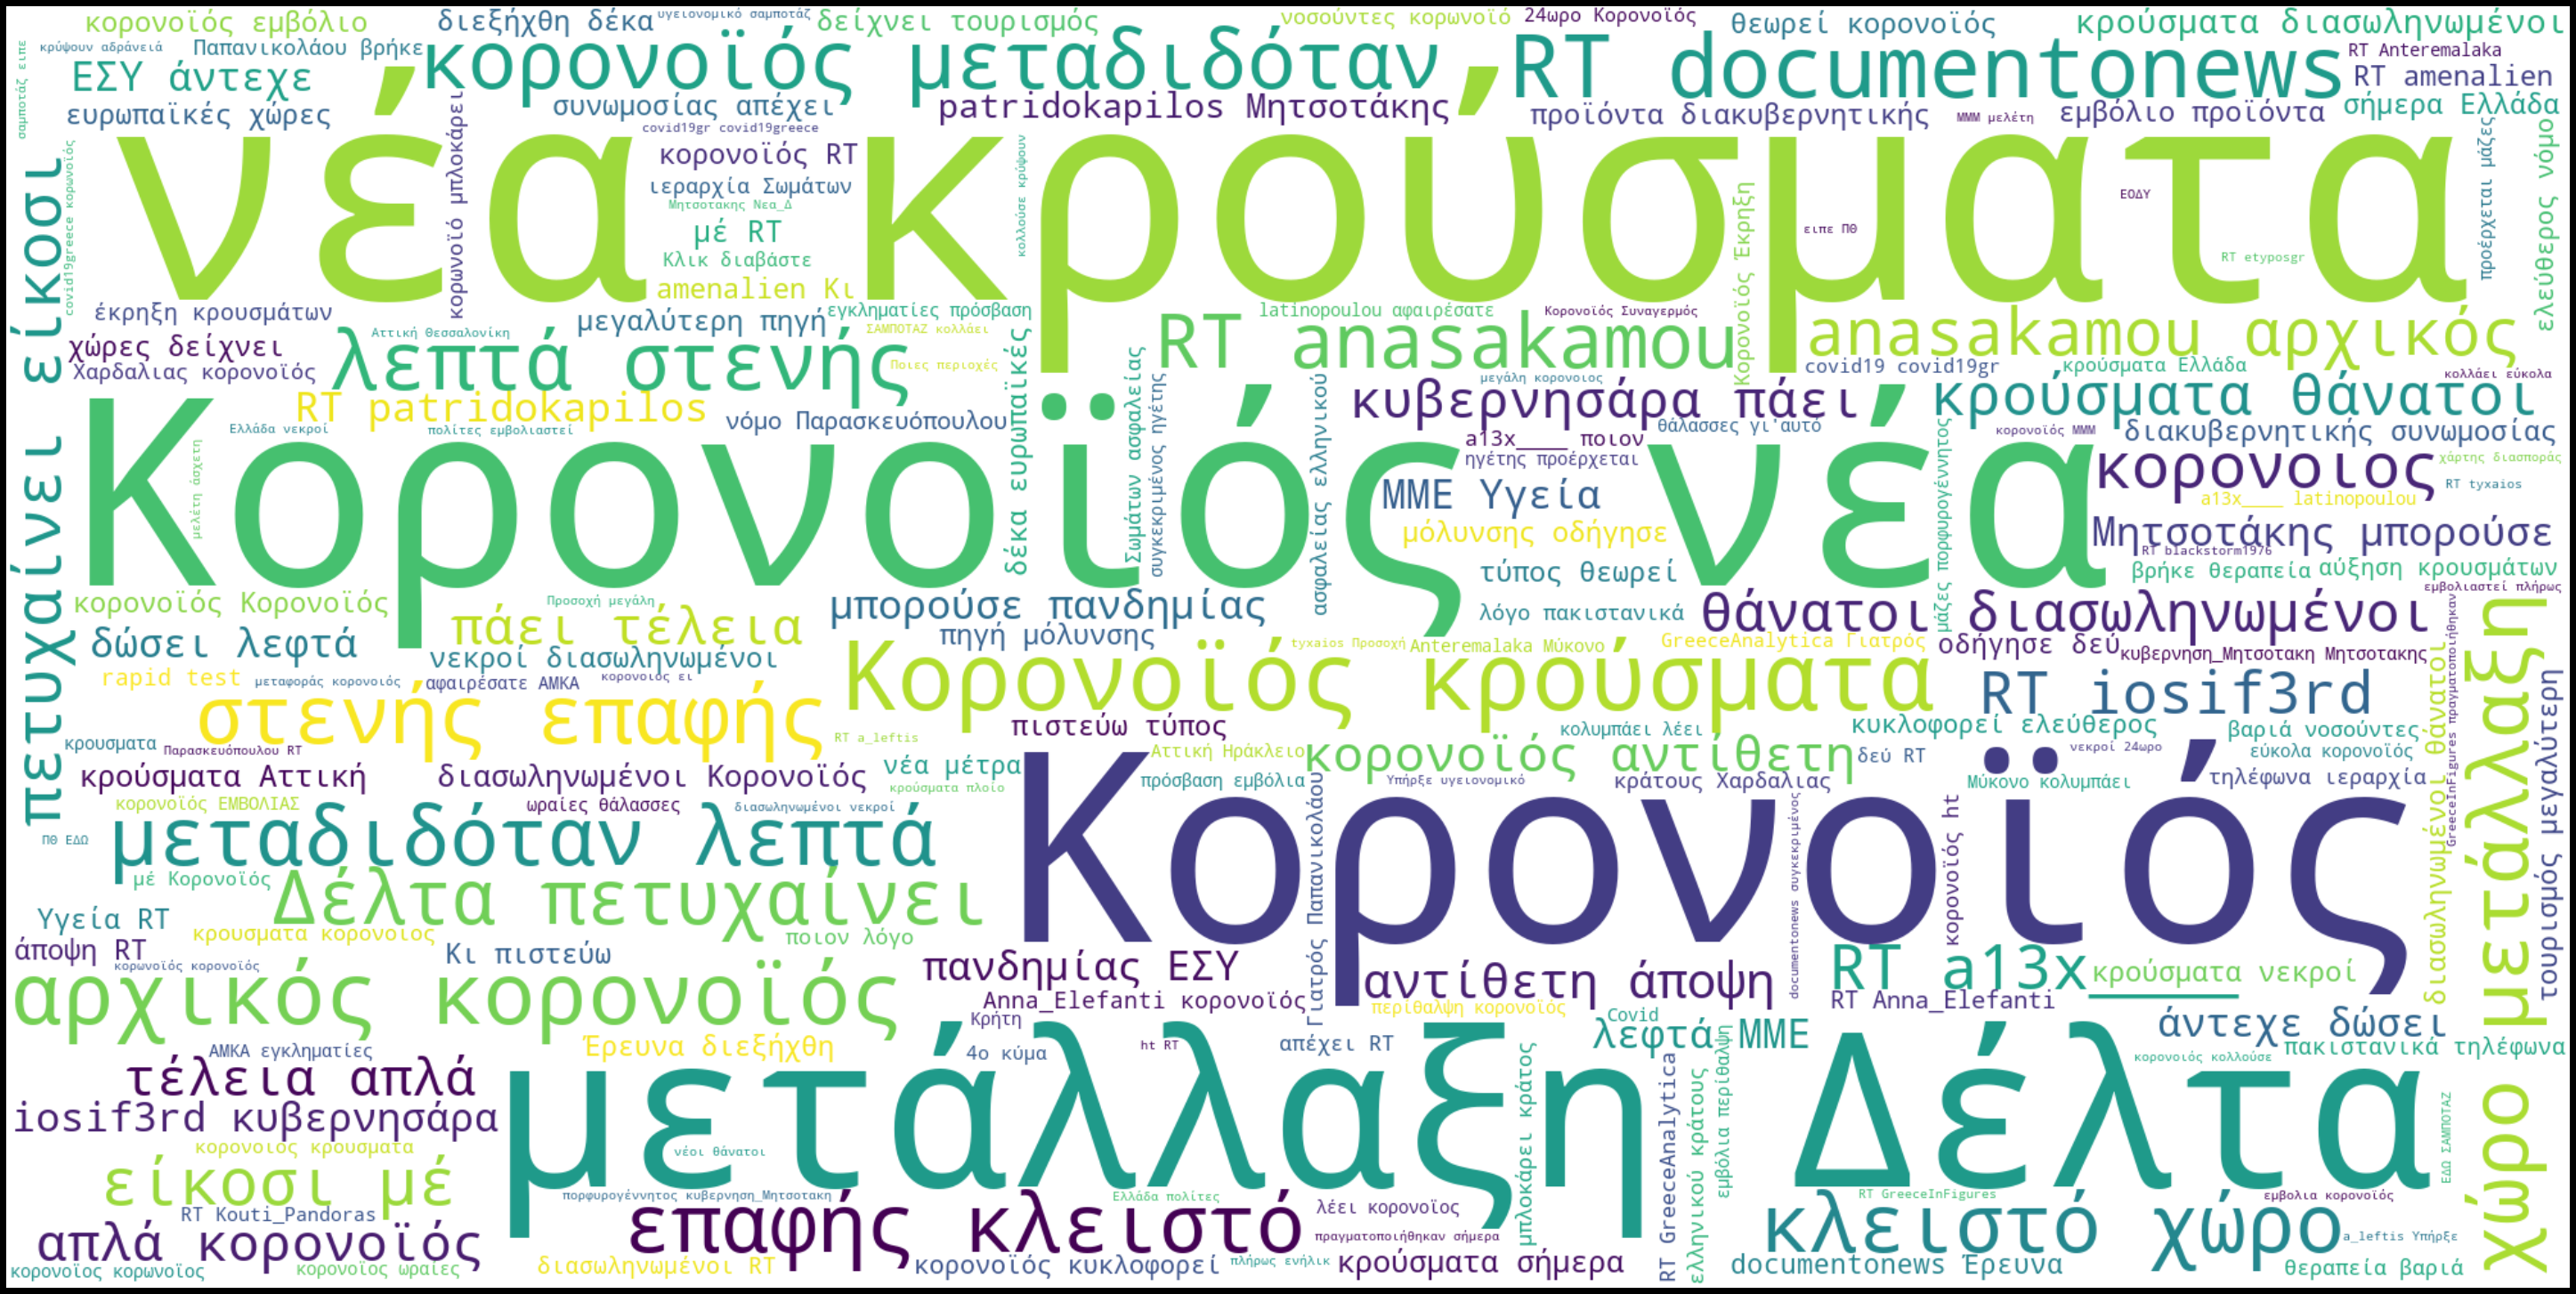

In [292]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [293]:
list(STOPWORDS)[0:20]

['they',
 'there',
 "we've",
 "he's",
 'hers',
 'your',
 'a',
 'http',
 'until',
 'he',
 'under',
 "i'll",
 'ever',
 'should',
 'than',
 'where',
 'about',
 "i'd",
 'shall',
 'ourselves']

In [294]:
doc = nlp(short_tweets['text'][1])

In [295]:
for token in doc:
    print(token, token.lemma_)

RT rt
@a13x @a13x
_ _
_ _
_ _
_ _
: :
H h
απόβαση απόβαση
των των
νέων νέος
έδειξε έδειξε
ότι ότι
δεν δεν
υπάρχει υπάρχω
κανένας κανένας
έλεγχος έλεγχος

 

case case
closed closed
# #
κορονοϊός κορονοϊός
# #
κυβερνηση_τσιρκο κυβερνηση_τσιρκο
   


In [296]:
' '.join(token.lemma_ for token in doc)

'rt @a13x _ _ _ _ : h απόβαση των νέος έδειξε ότι δεν υπάρχω κανένας έλεγχος \n case closed # κορονοϊός # κυβερνηση_τσιρκο  '

In [297]:
text

'RT @BarbaraDavari: Χάρισμά σας το #freedom_pass εκεί στην #κυβερνηση_τσιρκο🤬\n#κορονοιος #κορωνοιος #εμβολιασμοι #εμβολιο #κρουσματα \nhttps:… RT @a13x____: H απόβαση των νέων έδειξε ότι δεν υπάρχει κανένας έλεγχος \ncase closed #κορονοϊός #κυβερνηση_τσιρκο   RT @GreeceAnalytica: Γιατρός του Παπανικολάου βρήκε θεραπεία για βαριά νοσούντες από κορωνοϊό και τον μπλοκάρει το κράτος\xa0💢\n  #κρουσματα #κορονοιος #Ελλαδα #μεταλλαξη_Δελτα #Ηρακλειο #Αττική   @trantouu @prwinveronica κορονοιός εντερντ δε τσατ Πιερρακάκης: Ο κορονοϊός λειτούργησε ως επιταχυντής για την ψηφιοποίηση -   @wolves_sheep @Victor_Shade_ Ούτε ο κορονοϊος δεν έκανε δουλίτσα RT @nomorelies_gr: «διαίρει και βασίλευε»\n\n#κορονοϊός #εμβολια #εμβολιασμος #κυβερνηση_καρναβαλι #διεφθαρμενοι_πολιτικοι #ΝΔ_Χουντα Εμβόλια #Pfizer – #Moderna: Ποιες οι πιθανότητες να κολλήσετε κορονοϊό μετά τη 2η δόση   Κορονοϊός tours: Στην Ιο πάνω από 2.100 έφηβοι - Πολλοί ήταν και στον Άλιμο   RT @GreeceAnalytica: Γιατρός του Παπανικολάου βρή

In [298]:
full_doc = nlp(text)

In [299]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [300]:
clear_text[200:400]

' ότι δεν υπάρχω κανένας έλεγχος \n case closed # κορονοϊός # κυβερνηση_τσιρκο    rt @greeceanalytica : γιατρός του Παπανικολάου βρήκε θεραπεία για βαριά νοσούντα από κορωνοϊό και τον μπλοκάρει το κράτο'

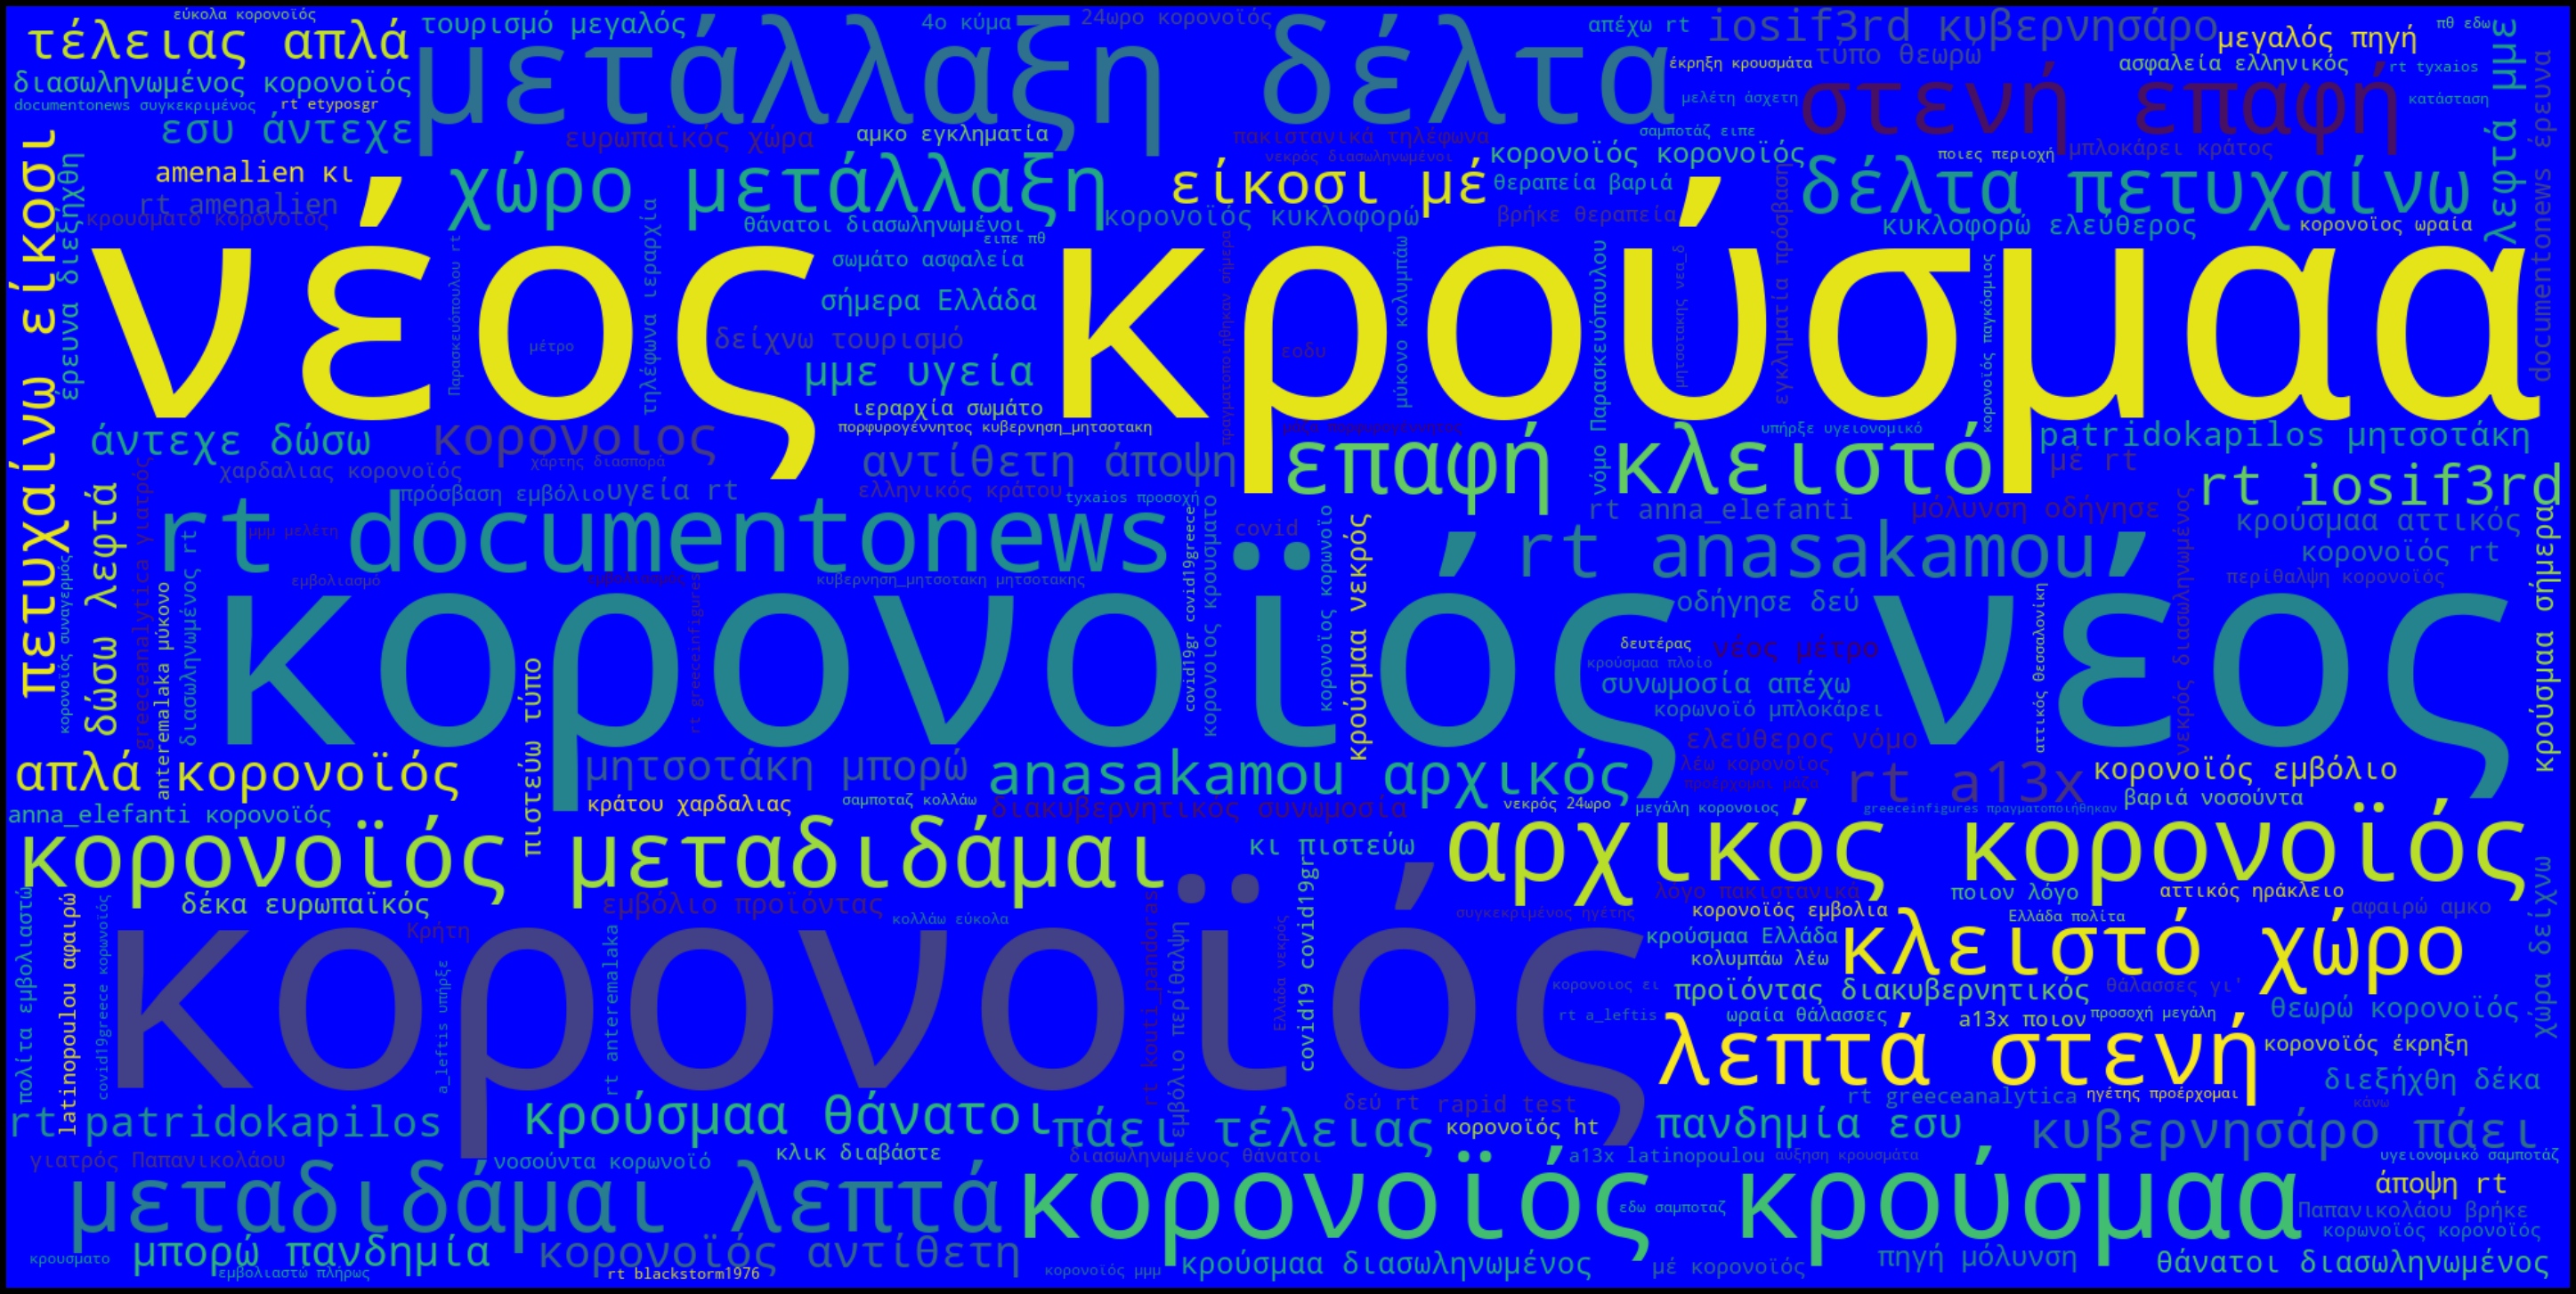

In [301]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'blue'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [302]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [303]:
count_vector = cv.fit_transform(short_tweets['text'])

In [304]:
count_vector.shape

(3900, 5397)

In [305]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

00  000  0004  001  002  007  ...  ύψη  ύψος  ύψους  ώρα  ώρες  ἐπίθετα
0   0    0     0    0    0    0  ...    0     0      0    0     0        0
1   0    0     0    0    0    0  ...    0     0      0    0     0        0
2   0    0     0    0    0    0  ...    0     0      0    0     0        0
3   0    0     0    0    0    0  ...    0     0      0    0     0        0
4   0    0     0    0    0    0  ...    0     0      0    0     0        0

[5 rows x 5397 columns]

In [306]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [307]:
count_vector = cv.fit_transform(short_tweets['text'])

In [308]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  07  10  107  15  153  ...  χάρτης  χαρδαλιά  χαρδαλιας  χώρα  χώρες  χώρο
0    0   0   0    0   0    0  ...       0         0          0     0      0     0
1    0   0   0    0   0    0  ...       0         0          0     0      0     0
2    0   0   0    0   0    0  ...       0         0          0     0      0     0
3    0   0   0    0   0    0  ...       0         0          0     0      0     0
4    0   0   0    0   0    0  ...       0         0          0     0      0     0

[5 rows x 135 columns]

In [309]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [310]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκαστας', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικο', 'αφότο', 'βεβαιόταα', 'γρήγορας', 'δίχω', 'εαυτά', 'εκάστο', 'ετού', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιέ', 'ποιώ', 'πολλός', 'προχθής', 'προχτέ', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτε', 'ταύτο', 'τούτε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


\n\n   ...  1.797  1.820  153  ...  χάρτης  χαρδαλί  χαρδαλια  χώρα  χώρο
0      0    0      0      0    0  ...       0        0         0     0     0
1      0    0      0      0    0  ...       0        0         0     0     0
2      0    0      0      0    0  ...       0        0         0     0     0
3      0    0      0      0    0  ...       0        0         0     0     0
4      0    0      0      0    0  ...       0        0         0     0     0

[5 rows x 129 columns]

In [311]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

15  rt  αρχικός  αττική  δέλτα  ...  λεπτά  μετάλλαξη  νέα  πανδημίας  σήμερα
0   0   1        0       0      0  ...      0          0    0          0       0
1   0   1        0       0      0  ...      0          0    0          0       0
2   0   1        0       0      0  ...      0          0    0          0       0
3   0   0        0       1      0  ...      0          0    0          0       0
4   0   0        0       0      0  ...      0          0    0          0       0

[5 rows x 20 columns]

In [312]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

15 λεπτά  anasakamou αρχικός  ...  στενής επαφής  χώρο μετάλλαξη
0         0                   0  ...              0               0
1         0                   0  ...              0               0
2         0                   0  ...              0               0
3         0                   0  ...              0               0
4         0                   0  ...              0               0

[5 rows x 20 columns]

In [313]:
results.sum(axis =0).sort_values(ascending = False)

νέα κρούσματα            395
μετάλλαξη δέλτα          184
χώρο μετάλλαξη           131
κλειστό χώρο             131
rt documentonews         131
αρχικός κορονοϊός        131
δέλτα πετυχαίνει         131
στενής επαφής            131
επαφής κλειστό           131
κορονοϊός μεταδιδόταν    131
λεπτά στενής             131
μεταδιδόταν 15           131
15 λεπτά                 131
είκοσι μέ                130
πετυχαίνει είκοσι        130
rt anasakamou            130
anasakamou αρχικός       130
rt a13x____              120
rt iosif3rd              119
πάει τέλεια              102
dtype: int64

In [314]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

νέα κρούσματα       395
μετάλλαξη δέλτα     184
χώρο μετάλλαξη      131
κλειστό χώρο        131
rt documentonews    131
dtype: int64

In [315]:
results.sum(axis =0).sort_values(ascending = False)

νέα κρούσματα            395
μετάλλαξη δέλτα          184
χώρο μετάλλαξη           131
κλειστό χώρο             131
rt documentonews         131
αρχικός κορονοϊός        131
δέλτα πετυχαίνει         131
στενής επαφής            131
επαφής κλειστό           131
κορονοϊός μεταδιδόταν    131
λεπτά στενής             131
μεταδιδόταν 15           131
15 λεπτά                 131
είκοσι μέ                130
πετυχαίνει είκοσι        130
rt anasakamou            130
anasakamou αρχικός       130
rt a13x____              120
rt iosif3rd              119
πάει τέλεια              102
dtype: int64

In [316]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['νέα κρούσματα ', 'φταίμε εμείς']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()


νέα κρούσματα   φταίμε εμείς
0               0             0
1               0             0
2               0             0
3               0             0
4               0             0

In [317]:
sum_words.sort_values(ascending = False).head(17)

νέα κρούσματα            395
μετάλλαξη δέλτα          184
χώρο μετάλλαξη           131
κλειστό χώρο             131
rt documentonews         131
αρχικός κορονοϊός        131
δέλτα πετυχαίνει         131
στενής επαφής            131
επαφής κλειστό           131
κορονοϊός μεταδιδόταν    131
λεπτά στενής             131
μεταδιδόταν 15           131
15 λεπτά                 131
είκοσι μέ                130
πετυχαίνει είκοσι        130
rt anasakamou            130
anasakamou αρχικός       130
dtype: int64

In [318]:
most_common=sum_words.sort_values(ascending = False).head(16)

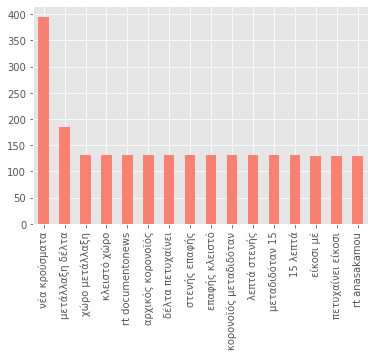

In [319]:
most_common.plot(kind='bar',color='salmon')

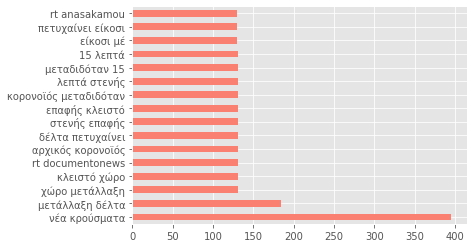

In [320]:
most_common.plot(kind='barh',color='salmon')

In [321]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [322]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_tweets['text'])

In [323]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

000   07   10  100  107   12  ...  ψεκια  ωραίες  ύποπτα  ύψη  ώρα  ώρες
0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0     0.0     0.0  0.0  0.0   0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0     0.0     0.0  0.0  0.0   0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0     0.0     0.0  0.0  0.0   0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0     0.0     0.0  0.0  0.0   0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0     0.0     0.0  0.0  0.0   0.0

[5 rows x 500 columns]

In [324]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.16184301 0.01504351 ... 0.         0.         0.        ]]


In [325]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.16184301 0.01504351 ... 0.         0.         0.        ]
 [0.16184301 1.         0.01131642 ... 0.0110277  0.00823741 0.00823741]
 [0.01504351 0.01131642 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.0110277  0.         ... 1.         0.7469748  0.7469748 ]
 [0.         0.00823741 0.         ... 0.7469748  1.         1.        ]
 [0.         0.00823741 0.         ... 0.7469748  1.         1.        ]]


In [326]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

In [327]:
similaritydf=pd.DataFrame(arr)

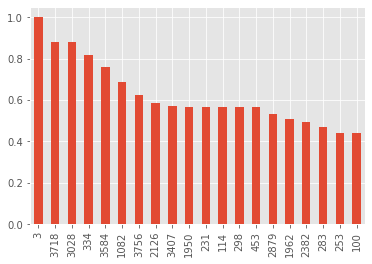

In [328]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [329]:
short_tweets['text'].loc[1]

'RT @a13x____: H απόβαση των νέων έδειξε ότι δεν υπάρχει κανένας έλεγχος \ncase closed #κορονοϊός #κυβερνηση_τσιρκο  '

In [330]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [331]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
0            αφεση       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
1  ενορκη βεβαιωση       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
2          εχοντας       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
3              εχω       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
4             οριο       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [332]:
emolex_df.tail()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
13166     ουρλιασμα       0.0       1.0    1.0  ...  0.0      0.0       1.0    0.0
13167  κροκος αυγου       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13168      νεοτερος       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13169       ζεφυρος       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13170          ζουμ       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [333]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [334]:
emolex_df.tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0
13157  13167  κροκος αυγου       0.0       0.0  ...  0.0      0.0       0.0    0.0
13158  13168      νεοτερος       1.0       0.0  ...  0.0      0.0       0.0    0.0
13159  13169       ζεφυρος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13160  13170          ζουμ       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [335]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [336]:
full_tweets_df=pd.read_csv("./koronoios.csv")

In [337]:
len(full_tweets_df)

3900

In [338]:
short_tweets.dtypes

date        datetime64[ns, UTC]
text                     object
entities                 object
year                      int64
month                     int64
day                       int64
dtype: object

In [339]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [340]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [341]:
short_tweets

date  ... day
0    2021-07-08 21:13:09+00:00  ...   8
1    2021-07-08 21:13:03+00:00  ...   8
2    2021-07-08 21:10:31+00:00  ...   8
3    2021-07-08 21:08:58+00:00  ...   8
4    2021-07-08 20:58:56+00:00  ...   8
...                        ...  ...  ..
3895 2021-07-04 08:18:23+00:00  ...   4
3896 2021-07-04 08:16:31+00:00  ...   4
3897 2021-07-04 08:14:38+00:00  ...   4
3898 2021-07-04 08:13:00+00:00  ...   4
3899 2021-07-04 08:12:59+00:00  ...   4

[3900 rows x 6 columns]

In [342]:
short_tweets.head()

date  ... day
0 2021-07-08 21:13:09+00:00  ...   8
1 2021-07-08 21:13:03+00:00  ...   8
2 2021-07-08 21:10:31+00:00  ...   8
3 2021-07-08 21:08:58+00:00  ...   8
4 2021-07-08 20:58:56+00:00  ...   8

[5 rows x 6 columns]

In [343]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [344]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#                strip_accents = 'unicode', 
#                token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#                stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(short_tweets['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

αφεση  ενορκη βεβαιωση  εχοντας  εχω  ...  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ
0      0                0        0    0  ...             0         0        0     0
1      0                0        0    0  ...             0         0        0     0
2      0                0        0    0  ...             0         0        0     0
3      0                0        0    0  ...             0         0        0     0
4      0                0        0    0  ...             0         0        0     0

[5 rows x 13161 columns]

In [345]:
wordcount_df.shape

(3900, 13161)

In [346]:
emolex_df.head()

index             word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
0      0            αφεση       1.0       0.0  ...  0.0      0.0       0.0    0.0
1      1  ενορκη βεβαιωση       0.0       0.0  ...  0.0      0.0       0.0    0.0
2      2          εχοντας       0.0       0.0  ...  0.0      0.0       0.0    0.0
3      3              εχω       0.0       0.0  ...  0.0      0.0       0.0    0.0
4      4             οριο       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [347]:
emolex_df[emolex_df.Anger == 1].tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13094  13104      διεξοδος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13096  13106        ζωυφια       0.0       1.0  ...  0.0      0.0       0.0    0.0
13100  13110    θυματοποιω       0.0       1.0  ...  0.0      1.0       1.0    0.0
13128  13138  αποτυχημενος       0.0       1.0  ...  0.0      0.0       0.0    0.0
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0

[5 rows x 12 columns]

In [348]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [349]:
short_tweets.head(3)

date  ... day
0 2021-07-08 21:13:09+00:00  ...   8
1 2021-07-08 21:13:03+00:00  ...   8
2 2021-07-08 21:10:31+00:00  ...   8

[3 rows x 6 columns]

In [350]:
short_tweets['anger'] = wordcount_df[angry_words].sum(axis=1)

short_tweets['positivity'] = wordcount_df[positive_words].sum(axis=1)


short_tweets['joy'] = wordcount_df[joy_words].sum(axis=1)


short_tweets['disgust'] = wordcount_df[disgust_words].sum(axis=1)



short_tweets['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_tweets['trust'] = wordcount_df[trust_words].sum(axis=1)


short_tweets['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


short_tweets['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_tweets['negative'] = wordcount_df[negative_words].sum(axis=1)

short_tweets['fear'] = wordcount_df[fear_words].sum(axis=1)

In [351]:
short_tweets

date  ... fear
0    2021-07-08 21:13:09+00:00  ...    0
1    2021-07-08 21:13:03+00:00  ...    0
2    2021-07-08 21:10:31+00:00  ...    0
3    2021-07-08 21:08:58+00:00  ...    0
4    2021-07-08 20:58:56+00:00  ...    0
...                        ...  ...  ...
3895 2021-07-04 08:18:23+00:00  ...    0
3896 2021-07-04 08:16:31+00:00  ...    1
3897 2021-07-04 08:14:38+00:00  ...    0
3898 2021-07-04 08:13:00+00:00  ...    0
3899 2021-07-04 08:12:59+00:00  ...    0

[3900 rows x 16 columns]

In [352]:
short_tweets.set_index('date', inplace=True)

In [353]:
short_tweets.groupby(by=short_tweets.index.day)

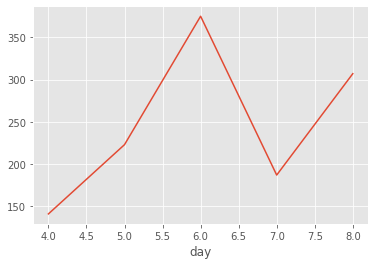

In [354]:
short_tweets.groupby(["day"])['negative'].sum().plot()

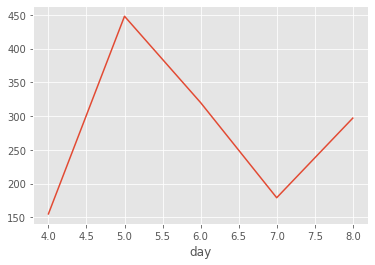

In [355]:
short_tweets.groupby(["day"])['positivity'].sum().plot()

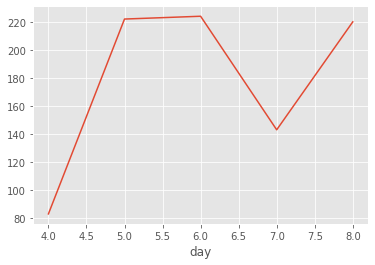

In [356]:
short_tweets.groupby(["day"])['trust'].sum().plot()

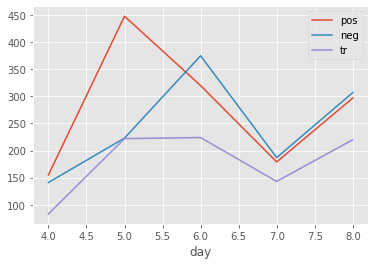

In [357]:
short_tweets.groupby(["day"]).agg(
    pos=("positivity", "sum"), neg=("negative", "sum"), tr=("trust", "sum")
    ).plot()

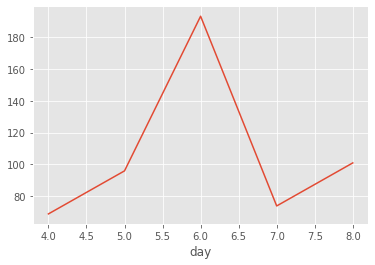

In [369]:
short_tweets.groupby(["day"])['anger'].sum().plot()

In [358]:
short_tweets.groupby(["day"]).positivity.sum()

day
4    155
5    448
6    320
7    179
8    297
Name: positivity, dtype: int64

In [365]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [367]:
import matplotlib.pyplot as plt

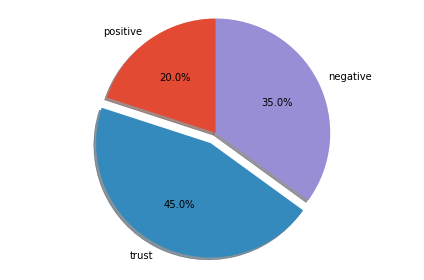

In [368]:
# Pie chart
labels = ['positive', 'trust', 'negative']
sizes = [20, 45, 35]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()